In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
from scipy.spatial import Voronoi
# for requirements: install fastparquet 

import glob # not needed in requirements

## 1. Random operations on data

### Raw data processing: removing null HO and grouping by eNB pairs

In [2]:
PATH_TOPO = '..\\..\\Data_Handover\\TOPO\\Lyon\\part-00000-2f038a97-7faf-46f3-aee2-b73b52bf2cba.snappy.parquet'

In [3]:
enb_df = pd.read_parquet(PATH_TOPO, engine='fastparquet')
enb_df.astype({'LON': 'float64',
                  'LAT': 'float64'}).to_parquet(PATH_TOPO, engine='fastparquet', compression='snappy')

In [3]:
enb_df = pd.read_parquet(PATH_TOPO, engine='fastparquet')
enb_df

,LocInfo,TECHNO,LON,LAT
0,8102f8100000ba1a,4G,4.805831,45.881115
1,8102f8100000ae6f,4G,5.103326,45.661649
2,8102f8100000b9fc,4G,5.006670,45.770836
3,8102f8100000999d,4G,4.888138,45.738378
4,8102f81000009baf,4G,4.889202,45.744970
...,...,...,...,...
9324,0102f810041ec940,3G,4.695403,45.642543
9325,0002f8100705368e,2G,4.849999,45.753893
9326,0002f810511084f7,2G,4.768475,45.784375
9327,0102f810041e6337,3G,4.865802,45.673625


In [ ]:
PATH_HO = '..\\..\\Data_Handover\\usersHandovers\\2019\\03\\16\\Lyon_HO_IN'

all_files = glob.glob(PATH_HO + "\\*.parquet")

li = []

for filename in all_files:
    df = pd.read_parquet(filename, engine='fastparquet')
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,timeSlot,srcLocInfo,dstLocInfo,nbHO15
0,1552734000,8102f81000009986,8102f81000009991,171
1,1552753800,8102f810000099d1,8102f810000099ae,1508
2,1552757400,8102f8100000a481,8102f81000009c31,814
3,1552753800,8102f81000009de8,8102f81000009d5e,277
4,1552732200,8102f81000009952,8102f81000009975,1198
...,...,...,...,...
719641,1552759200,0002f8100704edda,0002f8100704512d,0
719642,1552759200,0002f81051100807,0002f81051053587,0
719643,1552746600,8102f8100000ba74,8102f8100000ba60,0
719644,1552770000,8102f810000099c9,8102f8100000babc,0


In [9]:
agg = frame.groupby('timeSlot')['nbHO15'].sum()
time_df = pd.DataFrame(agg)
time_df.head()

,nbHO15
timeSlot,
1552690800,321050
1552692600,238867
1552694400,202796
1552696200,146731
1552698000,125253


In [7]:
d = datetime.datetime(2019, 3, 16, 1, 0, 0)
print(d)

import time
utsp = time.mktime(d.timetuple())
print(utsp)

2019-03-16 01:00:00
1552694400.0


In [21]:
ser = pd.Series()
for idx,row in time_df.iterrows():
    ser[idx] = datetime.datetime.fromtimestamp(row.name)
time_df['Time'] = ser
time_df

,nbHO15,Time
timeSlot,,
1552690800,321050,2019-03-16 00:00:00
1552692600,238867,2019-03-16 00:30:00
1552694400,202796,2019-03-16 01:00:00
1552696200,146731,2019-03-16 01:30:00
1552698000,125253,2019-03-16 02:00:00
1552699800,113050,2019-03-16 02:30:00
1552701600,106047,2019-03-16 03:00:00
1552703400,106442,2019-03-16 03:30:00
1552705200,105907,2019-03-16 04:00:00


In [5]:
agg = frame.groupby(['srcLocInfo', 'dstLocInfo'])['nbHO15'].sum()
df_agg = pd.DataFrame(agg)
df_agg = df_agg[df_agg['nbHO15'] >0] 
#agg = agg.drop(agg.loc[agg.values==0].index)
#agg
df_agg

nbHO15
srcLocInfo       dstLocInfo              
0002f81000686160 0002f81007013bfa      26
0002f810041c2388 0002f81007041283      16
0002f81007011463 0002f8100701fe3f      31
0002f81007011465 0002f810070126d7      17
0002f810070114de 0002f81007013336    1240
...                                   ...
8102f8100000bad0 8102f8100000a1fa     515
                 8102f8100000a4d9      57
                 8102f8100000b9cc    5924
                 8102f8100000ba30     189
                 8102f8100000babe     184

[11700 rows x 1 columns]

In [35]:
df_agg.to_parquet(path='HO_AGG.snappy.parquet', engine='fastparquet', compression='snappy')

In [36]:
pd.read_parquet(path='HO_AGG.snappy.parquet', engine='fastparquet')

nbHO15
srcLocInfo       dstLocInfo              
0002f81000686160 0002f81007013bfa      26
0002f810041c2388 0002f81007041283      16
0002f81007011463 0002f8100701fe3f      31
0002f81007011465 0002f810070126d7      17
0002f810070114de 0002f81007013336    1240
...                                   ...
8102f8100000bad0 8102f8100000a1fa     515
                 8102f8100000a4d9      57
                 8102f8100000b9cc    5924
                 8102f8100000ba30     189
                 8102f8100000babe     184

[11700 rows x 1 columns]

In [20]:
AGG_PATH_DAY = '..\\Processed_data\\HO_AGG_16-22_DAYTIME.snappy.parquet'
agg_df_day = pd.read_parquet(path=AGG_PATH_DAY, engine='fastparquet')
agg_df_day = agg_df_day.reset_index()
agg_df_day

,srcLocInfo,dstLocInfo,nbHO15
0,0002f81000680300,0002f8100701fe5e,30
1,0002f8100068258d,0002f8100701fe5e,33
2,0002f81000683d30,0002f81007011bf5,20
3,0002f81000685a56,0002f81007012d5c,15
4,0002f81000686160,0002f81007013bfa,158
...,...,...,...
20111,8102f8100000bad0,8102f8100000ba30,875
20112,8102f8100000bad0,8102f8100000ba34,52
20113,8102f8100000bad0,8102f8100000ba49,70
20114,8102f8100000bad0,8102f8100000babe,212


In [21]:
AGG_PATH_NIGHT = '..\\Processed_data\\HO_AGG_16-22_NIGHTTIME.snappy.parquet'
agg_df_night = pd.read_parquet(path=AGG_PATH_NIGHT, engine='fastparquet')
agg_df_night = agg_df_night.reset_index()
agg_df_night

,srcLocInfo,dstLocInfo,nbHO15
0,0002f810041e255d,0002f810070370f7,17
1,0002f81007011466,0002f8100701b837,38
2,0002f810070114de,0002f81007013336,867
3,0002f810070114de,0002f81007018fd8,612
4,0002f810070124e2,0002f810070124e6,27
...,...,...,...
5067,8102f8100000bad0,8102f810000099c6,1173
5068,8102f8100000bad0,8102f81000009b28,504
5069,8102f8100000bad0,8102f8100000a01d,137
5070,8102f8100000bad0,8102f8100000b9cc,442


### Joining src and dst coordinates

In [22]:
# Add src EnB coordinates
agg_df_day = agg_df_day.join(enb_df.set_index('LocInfo'), on='srcLocInfo')
agg_df_day.rename(columns={'TECHNO':'srcTechno','LON':'srcLON', 'LAT':'srcLAT'}, inplace=True)

# Add dst EnB coordinates
agg_df_day = agg_df_day.join(enb_df.set_index('LocInfo'), on='dstLocInfo')
agg_df_day.rename(columns={'TECHNO':'dstTechno','LON':'dstLON', 'LAT':'dstLAT'}, inplace=True)

agg_df_day = agg_df_day.loc[agg_df_day['srcTechno']=='4G'] # no need to filter by dstTechno, same output
agg_df_day

,srcLocInfo,dstLocInfo,nbHO15,srcTechno,srcLON,srcLAT,dstTechno,dstLON,dstLAT
3178,8102f8100000992d,8102f810000099cd,21,4G,4.911542,45.777576,4G,4.861666,45.773614
3179,8102f8100000992d,8102f81000009c44,1502,4G,4.911542,45.777576,4G,4.925007,45.773378
3180,8102f8100000992d,8102f81000009f21,361,4G,4.911542,45.777576,4G,4.898554,45.787055
3181,8102f8100000992d,8102f81000009fed,2377,4G,4.911542,45.777576,4G,4.889721,45.772503
3182,8102f8100000992d,8102f8100000a2a1,1582,4G,4.911542,45.777576,4G,4.898178,45.766288
...,...,...,...,...,...,...,...,...,...
20111,8102f8100000bad0,8102f8100000ba30,875,4G,4.820179,45.775520,4G,4.859129,45.802421
20112,8102f8100000bad0,8102f8100000ba34,52,4G,4.820179,45.775520,4G,4.869052,45.815295
20113,8102f8100000bad0,8102f8100000ba49,70,4G,4.820179,45.775520,4G,4.775058,45.790371
20114,8102f8100000bad0,8102f8100000babe,212,4G,4.820179,45.775520,4G,4.814739,45.775244


In [23]:
# Add src EnB coordinates
agg_df_night = agg_df_night.join(enb_df.set_index('LocInfo'), on='srcLocInfo')
agg_df_night.rename(columns={'TECHNO':'srcTechno','LON':'srcLON', 'LAT':'srcLAT'}, inplace=True)

# Add dst EnB coordinates
agg_df_night = agg_df_night.join(enb_df.set_index('LocInfo'), on='dstLocInfo')
agg_df_night.rename(columns={'TECHNO':'dstTechno','LON':'dstLON', 'LAT':'dstLAT'}, inplace=True)

agg_df_night = agg_df_night.loc[agg_df_night['srcTechno']=='4G'] # no need to filter by dstTechno, same output
agg_df_night

,srcLocInfo,dstLocInfo,nbHO15,srcTechno,srcLON,srcLAT,dstTechno,dstLON,dstLAT
141,8102f8100000992d,8102f81000009fed,89,4G,4.911542,45.777576,4G,4.889721,45.772503
142,8102f8100000992d,8102f8100000ba05,77,4G,4.911542,45.777576,4G,4.917497,45.780833
143,8102f8100000992d,8102f8100000ba37,50,4G,4.911542,45.777576,4G,4.888378,45.776827
144,8102f8100000994e,8102f81000009973,32,4G,4.818062,45.762236,4G,4.822226,45.763890
145,8102f8100000994e,8102f8100000998e,49,4G,4.818062,45.762236,4G,4.826943,45.729725
...,...,...,...,...,...,...,...,...,...
5067,8102f8100000bad0,8102f810000099c6,1173,4G,4.820179,45.775520,4G,4.829172,45.776392
5068,8102f8100000bad0,8102f81000009b28,504,4G,4.820179,45.775520,4G,4.819723,45.771390
5069,8102f8100000bad0,8102f8100000a01d,137,4G,4.820179,45.775520,4G,4.789162,45.763888
5070,8102f8100000bad0,8102f8100000b9cc,442,4G,4.820179,45.775520,4G,4.818831,45.778989


In [24]:
agg_df_day.astype({'srcLON': 'float64',
                  'srcLAT': 'float64',
                  'dstLON': 'float64',
                  'dstLAT': 'float64'}).to_parquet(path='..\\Processed_data\\HO_AGG_16-22_DAYTIME_4G_coords.snappy.parquet', engine='fastparquet', compression='snappy')

agg_df_night.astype({'srcLON': 'float64',
                  'srcLAT': 'float64',
                  'dstLON': 'float64',
                  'dstLAT': 'float64'}).to_parquet(path='..\\Processed_data\\HO_AGG_16-22_NIGHTTIME_4G_coords.snappy.parquet', engine='fastparquet', compression='snappy')

In [26]:
agg_df_day = pd.read_parquet(path='..\\Processed_data\\HO_AGG_16-22_DAYTIME_4G_coords.snappy.parquet', engine='fastparquet')
agg_df_night = pd.read_parquet(path='..\\Processed_data\\HO_AGG_16-22_NIGHTTIME_4G_coords.snappy.parquet', engine='fastparquet')
agg_df_day

,srcLocInfo,dstLocInfo,nbHO15,srcTechno,srcLON,srcLAT,dstTechno,dstLON,dstLAT
index,,,,,,,,,
3178,8102f8100000992d,8102f810000099cd,21,4G,4.911542,45.777576,4G,4.861666,45.773614
3179,8102f8100000992d,8102f81000009c44,1502,4G,4.911542,45.777576,4G,4.925007,45.773378
3180,8102f8100000992d,8102f81000009f21,361,4G,4.911542,45.777576,4G,4.898554,45.787055
3181,8102f8100000992d,8102f81000009fed,2377,4G,4.911542,45.777576,4G,4.889721,45.772503
3182,8102f8100000992d,8102f8100000a2a1,1582,4G,4.911542,45.777576,4G,4.898178,45.766288
...,...,...,...,...,...,...,...,...,...
20111,8102f8100000bad0,8102f8100000ba30,875,4G,4.820179,45.775520,4G,4.859129,45.802421
20112,8102f8100000bad0,8102f8100000ba34,52,4G,4.820179,45.775520,4G,4.869052,45.815295
20113,8102f8100000bad0,8102f8100000ba49,70,4G,4.820179,45.775520,4G,4.775058,45.790371


In [27]:
agg_df_night

,srcLocInfo,dstLocInfo,nbHO15,srcTechno,srcLON,srcLAT,dstTechno,dstLON,dstLAT
index,,,,,,,,,
141,8102f8100000992d,8102f81000009fed,89,4G,4.911542,45.777576,4G,4.889721,45.772503
142,8102f8100000992d,8102f8100000ba05,77,4G,4.911542,45.777576,4G,4.917497,45.780833
143,8102f8100000992d,8102f8100000ba37,50,4G,4.911542,45.777576,4G,4.888378,45.776827
144,8102f8100000994e,8102f81000009973,32,4G,4.818062,45.762236,4G,4.822226,45.763890
145,8102f8100000994e,8102f8100000998e,49,4G,4.818062,45.762236,4G,4.826943,45.729725
...,...,...,...,...,...,...,...,...,...
5067,8102f8100000bad0,8102f810000099c6,1173,4G,4.820179,45.775520,4G,4.829172,45.776392
5068,8102f8100000bad0,8102f81000009b28,504,4G,4.820179,45.775520,4G,4.819723,45.771390
5069,8102f8100000bad0,8102f8100000a01d,137,4G,4.820179,45.775520,4G,4.789162,45.763888


In [15]:
agg_df_day.dtypes

srcLocInfo     object
dstLocInfo     object
nbHO15          int64
srcTechno      object
srcLON        float64
srcLAT        float64
dstTechno      object
dstLON        float64
dstLAT        float64
dtype: object

### Reducing to geographic zone of interest

In [28]:
lon1, lat1 = 4.764169, 45.70111
lon2, lat2 = 4.888378, 45.776827

In [29]:
# Reduce by source coords
agg_df_reduced_day = agg_df_day.loc[(agg_df_day['srcLON'] >= lon1) & (agg_df_day['srcLON'] <= lon2) & (agg_df_day['srcLAT'] >= lat1) & (agg_df_day['srcLAT'] <= lat2)]
agg_df_reduced_night = agg_df_night.loc[(agg_df_night['srcLON'] >= lon1) & (agg_df_night['srcLON'] <= lon2) & (agg_df_night['srcLAT'] >= lat1) & (agg_df_night['srcLAT'] <= lat2)]

In [30]:
# Reduce by destination coords
agg_df_reduced_day = agg_df_reduced_day.loc[(agg_df_reduced_day['dstLON'] >= lon1) & (agg_df_reduced_day['dstLON'] <= lon2) & (agg_df_reduced_day['dstLAT'] >= lat1) & (agg_df_reduced_day['dstLAT'] <= lat2)]
agg_df_reduced_night = agg_df_reduced_night.loc[(agg_df_reduced_night['dstLON'] >= lon1) & (agg_df_reduced_night['dstLON'] <= lon2) & (agg_df_reduced_night['dstLAT'] >= lat1) & (agg_df_reduced_night['dstLAT'] <= lat2)]
agg_df_reduced_night

,srcLocInfo,dstLocInfo,nbHO15,srcTechno,srcLON,srcLAT,dstTechno,dstLON,dstLAT
index,,,,,,,,,
144,8102f8100000994e,8102f81000009973,32,4G,4.818062,45.762236,4G,4.822226,45.763890
145,8102f8100000994e,8102f8100000998e,49,4G,4.818062,45.762236,4G,4.826943,45.729725
146,8102f8100000994e,8102f810000099a3,19,4G,4.818062,45.762236,4G,4.845132,45.747557
147,8102f8100000994e,8102f810000099b7,39,4G,4.818062,45.762236,4G,4.832777,45.772496
162,8102f81000009952,8102f81000009963,1785,4G,4.827545,45.752980,4G,4.830520,45.753373
...,...,...,...,...,...,...,...,...,...
5064,8102f8100000bacf,8102f8100000babc,11957,4G,4.867326,45.766061,4G,4.879249,45.766916
5066,8102f8100000bad0,8102f8100000997a,15,4G,4.820179,45.775520,4G,4.802506,45.767224
5067,8102f8100000bad0,8102f810000099c6,1173,4G,4.820179,45.775520,4G,4.829172,45.776392


In [31]:
agg_df_reduced_day.to_parquet(path='..\\Processed_data\\HO_AGG_16-22_DAYTIME_4G_coords_reduced.snappy.parquet', engine='fastparquet', compression='snappy')
agg_df_reduced_night.to_parquet(path='..\\Processed_data\\HO_AGG_16-22_NIGHTTIME_4G_coords_reduced.snappy.parquet', engine='fastparquet', compression='snappy')

In [5]:
agg_df_reduced = pd.read_parquet(path='..\\Processed_data\\HO_AGG_16-22_4G_coords_reduced.snappy.parquet', engine='fastparquet')
agg_df_reduced

,srcLocInfo,dstLocInfo,nbHO15,srcTechno,srcLON,srcLAT,dstTechno,dstLON,dstLAT
index,,,,,,,,,
3239,8102f8100000994e,8102f8100000994e,34,4G,4.818062,45.762236,4G,4.818062,45.762236
3240,8102f8100000994e,8102f81000009952,174,4G,4.818062,45.762236,4G,4.827545,45.752980
3241,8102f8100000994e,8102f81000009957,3879,4G,4.818062,45.762236,4G,4.826112,45.774444
3242,8102f8100000994e,8102f81000009958,1163,4G,4.818062,45.762236,4G,4.835282,45.761386
3243,8102f8100000994e,8102f8100000995b,17,4G,4.818062,45.762236,4G,4.858331,45.753607
...,...,...,...,...,...,...,...,...,...
20195,8102f8100000bad0,8102f8100000a01d,5663,4G,4.820179,45.775520,4G,4.789162,45.763888
20196,8102f8100000bad0,8102f8100000a104,15,4G,4.820179,45.775520,4G,4.863723,45.755097
20198,8102f8100000bad0,8102f8100000a4d9,57,4G,4.820179,45.775520,4G,4.829717,45.771114


In [6]:
enb_df = enb_df.loc[enb_df['LocInfo'].isin(agg_df_reduced['srcLocInfo'])] 
enb_df

,LocInfo,TECHNO,LON,LAT
3,8102f8100000999d,4G,4.888138,45.738378
5,8102f81000009b28,4G,4.819723,45.771390
9,8102f8100000997e,4G,4.875561,45.753615
12,8102f81000009976,4G,4.846672,45.729169
17,8102f81000009959,4G,4.822966,45.733027
...,...,...,...,...
574,8102f81000009f4a,4G,4.874679,45.764310
577,8102f8100000997b,4G,4.880686,45.725675
581,8102f8100000ba70,4G,4.867783,45.701943
582,8102f8100000996d,4G,4.864943,45.729614


(array([3.659e+03, 3.790e+02, 2.670e+02, 1.560e+02, 1.160e+02, 1.150e+02,
        6.500e+01, 6.500e+01, 4.200e+01, 5.500e+01, 5.700e+01, 4.800e+01,
        3.800e+01, 3.200e+01, 2.800e+01, 2.500e+01, 2.400e+01, 2.900e+01,
        2.100e+01, 1.600e+01, 2.000e+01, 1.700e+01, 1.300e+01, 1.000e+01,
        1.200e+01, 6.000e+00, 1.000e+01, 7.000e+00, 1.400e+01, 1.100e+01,
        1.200e+01, 8.000e+00, 9.000e+00, 7.000e+00, 8.000e+00, 4.000e+00,
        4.000e+00, 7.000e+00, 3.000e+00, 8.000e+00, 1.000e+01, 3.000e+00,
        8.000e+00, 0.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 4.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 6.000e+00, 2.000e+00,
        2.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

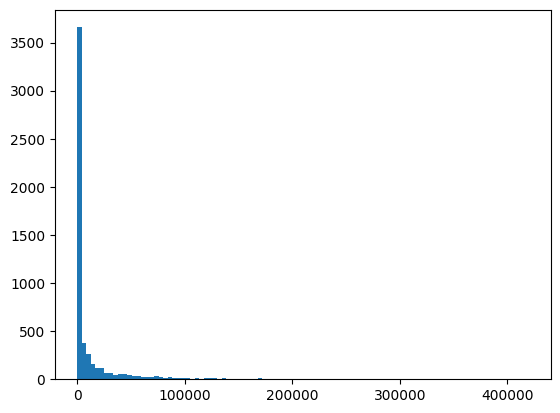

In [33]:
plt.hist(agg_df_reduced['nbHO15'], bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c9668535b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c966853af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c966853310>],
 'medians': [<matplotlib.lines.Line2D at 0x1c966853f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c9668611f0>],
 'means': []}

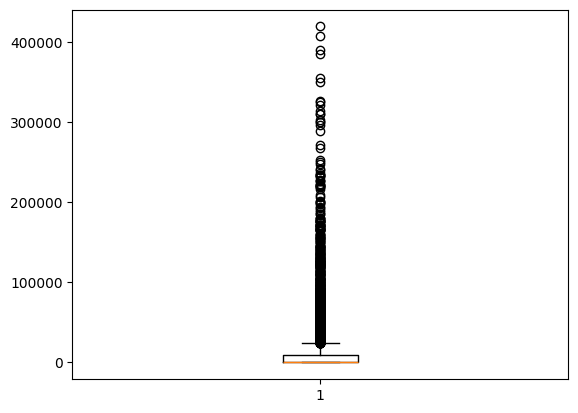

In [34]:
plt.boxplot(agg_df_reduced['nbHO15'])

In [6]:
print('Minimum number of HO:', agg_df_reduced['nbHO15'].min())
print('Maximum number of HO:', agg_df_reduced['nbHO15'].max())

Minimum number of HO: 15
Maximum number of HO: 419456


In [7]:
agg_df_reduced['nbHO15'].median()

np.float64(928.5)

### Ground-truth data

In [7]:
PATH_GT = '..\\..\\Data_Handover\\GroundTruth\\GROUNDTRUTH_'

bike_df = pd.read_parquet(PATH_GT + 'BICYCLE.snappy.parquet', engine='fastparquet')
car_df = pd.read_parquet(PATH_GT + 'CAR_1.snappy.parquet', engine='fastparquet')
tcl_df = pd.read_parquet(PATH_GT + 'TCL_1.snappy.parquet', engine='fastparquet')
bike_df

,LAT,LON
0,45.734265,4.804213
1,45.734325,4.803973
2,45.734300,4.803960
3,45.734170,4.803900
4,45.733809,4.803814
...,...,...
177,45.759297,4.852736
178,45.759364,4.853488
179,45.759442,4.854239
180,45.759532,4.855359


In [8]:
gt_start_enb = '8102f8100000ba53' 
gt_end_enb = '8102f8100000a0bc'

## 2. Creating Folium maps for visualization

In [9]:
def create_map():
    map = folium.Map([45.73303, 4.82297], tiles="OpenStreetMap", zoom_start=13)
    print('Created base station map.')
    return map

def add_stations(map, df, name='4G stations'):
    print('Adding '+name+' layer...')
    fg = folium.FeatureGroup(name=name) # Name as it will appear in Layer control
    enb_ids = df.srcLocInfo.unique()
    for id in enb_ids:
        enb_data = df.loc[df['srcLocInfo']==id]
        fg.add_child(folium.Marker(
            location=[enb_data['srcLAT'].iloc[-1], enb_data['srcLON'].iloc[-1]],
            popup=enb_data['srcLocInfo'].iloc[-1],
        ))
    map.add_child(fg)
    
def close_map(map, filename):
    folium.LayerControl().add_to(map)
    map.save('maps\\'+filename)
    print('Closing', filename, 'map.')
    
def add_voronoi(map, points):
    vor = Voronoi(list(zip(points['LAT'].tolist(), points['LON'].tolist())))  # Careful with the inversion!!  
    fg = folium.FeatureGroup(name='Voronoi cells', show=False)
    for enb, reg_idx in enumerate(vor.point_region):
        region = vor.regions[reg_idx]
        if -1 not in region and region != []:
            region_coords = []
            for vertex in region:
                region_coords.append(vor.vertices[vertex])
            fg.add_child(folium.Polygon(
                region_coords,
                color="black",
                weight=1,
                fill_color="darkgray",
                fill_opacity=0.2,
                fill=True,
            ))
    map.add_child(fg)


In [67]:
lyon = create_map()
add_stations(lyon, agg_df_reduced)
add_voronoi(lyon, enb_df)
close_map(lyon, 'lyon_markers.html')

Created base station map.
Adding 4G stations layer...
Closing lyon_markers.html map.


In [51]:
def add_flows(map, data, name='4G Handovers', min_weight=900):
    print('Adding Flow layer', name)
    fg = folium.FeatureGroup(name=name)
    flow_weight = {100000:2, 200000:4, 300000:6, 400000:8, 500000:10}
    flow_color = {2:'blue', 4:'green', 6:'yellow', 8:'orange', 10:'red'}
    for idx, row in data.iterrows():
        if row['nbHO15'] >= min_weight:
            fw = [v for k,v in flow_weight.items() if row['nbHO15'] <= k]
            fg.add_child(folium.PolyLine(
                [(row['srcLAT'], row['srcLON']), (row['dstLAT'], row['dstLON'])],
                color = flow_color[fw[0]],
                weight = fw[0],
                opacity = 0.8,
                tooltip = 'Weight: '+str(row['nbHO15'])
            ))
    map.add_child(fg)
    
    
def add_gt_path(map, data, name='Path', color='#AA0000'):
    print('Adding Path layer', name)
    fg = folium.FeatureGroup(name=name)
    fg.add_child(folium.PolyLine(
        locations=zip(data['LAT'].tolist(), data['LON'].tolist()),
        color = color,
        opacity = 0.8,
        weight = 5
    ))
    map.add_child(fg)
    
    
def add_voronoi_path(map, enb_data, cells_data, name='Cells path', color='green'):
    vor = Voronoi(list(zip(enb_data['LAT'].tolist(), enb_data['LON'].tolist())))  # Careful with the inversion!!  
    fg = folium.FeatureGroup(name=name, show=True)
    for enb_idx, reg_idx in enumerate(vor.point_region):
        region = vor.regions[reg_idx]
        cell_locinfo = enb_data.LocInfo.iloc[enb_idx]
        if cell_locinfo in cells_data['LocInfo'].values:
            if -1 not in region and region != []:
                region_coords = []
                for vertex in region:
                    region_coords.append(vor.vertices[vertex])
                fg.add_child(folium.Polygon(
                    region_coords,
                    color = color,
                    weight=1,
                    fill_color = color,
                    fill_opacity=0.3,
                    fill=True,
                ))
    map.add_child(fg)

In [48]:
mweight = agg_df_reduced['nbHO15'].mean()

lyon = create_map()
add_stations(lyon, agg_df_reduced)
add_voronoi(lyon, enb_df)
add_flows(lyon, agg_df_reduced, min_weight=mweight)
close_map(lyon, 'lyon_handovers.html')

Created base station map.
Adding 4G stations layer...
Adding Flow layer 4G Handovers
Closing lyon_handovers.html map.


In [11]:
lyon = create_map()
add_stations(lyon, agg_df_reduced)
add_voronoi(lyon, enb_df)

add_gt_path(lyon, bike_df, name='Bicycle')
add_gt_path(lyon, car_df, name='Car', color='green')
add_gt_path(lyon, tcl_df, name='TCL', color='blue')

#folium.CircleMarker(location=[45.736695, 4.805213], color='black', radius=5).add_to(lyon)

close_map(lyon, 'lyon_ground_truth.html')

Created base station map.
Adding 4G stations layer...
Adding Path layer Bicycle
Adding Path layer Car
Adding Path layer TCL
Closing lyon_ground_truth.html map.


In [21]:
def find_closest_cell(enb_df, point):
    cells = np.array(enb_df[['LAT','LON']])
    centroid = np.array(point) # point as bike_df.iloc[0]
    distances = np.linalg.norm(cells-centroid, axis=1)
    min_index = np.argmin(distances)
    return enb_df.loc[(enb_df['LAT']==cells[min_index][0]) & (enb_df['LON']==cells[min_index][1])]

def find_cells(enb_df, path_df):
    cells_list = []
    for idx, row in path_df.iterrows():
        cell = find_closest_cell(enb_df, row)
        cells_list.append(cell)
    cells = pd.concat(cells_list, axis=0, ignore_index=True)
    return cells.drop_duplicates()

In [48]:
cells_df = find_cells(enb_df, car_df)

In [52]:
lyon = create_map()
add_stations(lyon, agg_df_reduced)
add_voronoi(lyon, enb_df)

#add_gt_path(lyon, bike_df, name='Bicycle')
add_gt_path(lyon, car_df, name='Car', color='green')
#add_gt_path(lyon, tcl_df, name='TCL', color='blue')
add_voronoi_path(lyon, enb_df, cells_df, name='Cells: car', color='green')

close_map(lyon, 'lyon_ground_truth_voronoi.html')

Created base station map.
Adding 4G stations layer...
Adding Path layer Car
Closing lyon_ground_truth_voronoi.html map.
